In [28]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [29]:
type(data)

dict

In [30]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [31]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12238,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19886846.00000,19886846.00000,False,NaN,1,NaN,NaN,None,2025-07-03T09:24:00.000Z,110003.68737,54732282770.25377,13.82190,0.42735,2.12850,2.29842,4.64911,15.11775,30.32095,2187626390237.59082,64.43400,2310077434852.64014,None,2025-07-03T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:08:27.154178
1,1027,Ethereum,ETH,ethereum,10365,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120717217.53504,120717217.53504,True,NaN,2,NaN,NaN,None,2025-07-03T09:24:00.000Z,2604.14776,24095917448.87267,47.29290,0.12512,6.17219,5.25879,-0.02098,42.43527,42.50583,314365472228.30164,9.25930,314365472228.29999,None,2025-07-03T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:08:27.154178
2,825,Tether USDt,USDT,tether,134980,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,158273034529.21756,159822882404.82697,True,NaN,3,NaN,NaN,None,2025-07-03T09:23:00.000Z,1.00027,86536297425.61896,34.91270,-0.01314,-0.00248,-0.01143,-0.01532,-0.00249,0.03479,158316359854.99792,4.66300,159866631982.69000,None,2025-07-03T09:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-03 15:08:27.154178
3,52,XRP,XRP,xrp,1639,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59068187926.00000,99985968138.00000,False,NaN,4,NaN,NaN,None,2025-07-03T09:24:00.000Z,2.28383,4186870840.06602,45.09450,0.07580,4.00822,4.58981,4.21371,4.49770,9.23760,134901478307.88713,3.97340,228382625309.06000,None,2025-07-03T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:08:27.154178
4,1839,BNB,BNB,bnb,2600,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140885318.37000,140885318.37000,False,NaN,5,NaN,NaN,None,2025-07-03T09:24:00.000Z,662.70720,1574950155.40473,9.90100,0.07809,0.53993,2.36563,-0.43009,11.48514,10.74330,93365714418.91470,2.75000,93365714418.91000,None,2025-07-03T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:08:27.154178
5,5426,Solana,SOL,solana,944,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,534733041.75998,604452130.47649,True,NaN,6,525236893.30000,81939269385.29105,None,2025-07-03T09:24:00.000Z,156.00441,4102867404.15558,28.70700,0.25873,4.31420,8.11112,-1.85193,7.62712,31.07947,83420710382.12680,2.45710,94297195382.53999,None,2025-07-03T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:08:27.154178
6,3408,USDC,USDC,usd-coin,29029,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61703800221.81340,61703800221.81340,False,NaN,7,60901219650.23000,60897705877.17674,None,2025-07-03T09:24:00.000Z,0.99994,11799016474.12464,42.15060,-0.00427,-0.00468,0.00250,0.02057,-0.01579,0.00307,61700240142.85688,1.81730,61700240142.86000,None,2025-07-03T09:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-03 15:08:27.154178
7,1958,TRON,TRX,tron,1194,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94789156033.52336,94789164318.67998,True,NaN,8,71659659264.00000,20313828405.13844,None,2025-07-03T09:24:00.000Z,0.28348,500825656.75385,31.45830,-0.24985,0.78356,4.70196,4.81265,14.30738,18.47515,26870496875.22341,

In [32]:

df = pd.DataFrame() 

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
#     df2 = pd.json_normalize(data['data'])
#     df2['Timestamp'] = pd.to_datetime('now')
#     df = pd.concat([df, df2], ignore_index=False)


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\3505\OneDrive\Desktop\alex data analytics\automate api output\API.csv'):
        df.to_csv(r'C:\Users\3505\OneDrive\Desktop\alex data analytics\automate api output\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\3505\OneDrive\Desktop\alex data analytics\automate api output\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [33]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [34]:
df72 = pd.read_csv(r'C:\Users\3505\OneDrive\Desktop\alex data analytics\automate api output\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12238,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19886846.00000,19886846.00000,False,NaN,1,NaN,NaN,NaN,2025-07-03T09:24:00.000Z,110003.68737,54732282770.25377,13.82190,0.42735,2.12850,2.29842,4.64911,15.11775,30.32095,2187626390237.59082,64.43400,2310077434852.64014,NaN,2025-07-03T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:08:30.745502
1,1,1027,Ethereum,ETH,ethereum,10365,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120717217.53504,120717217.53504,True,NaN,2,NaN,NaN,NaN,2025-07-03T09:24:00.000Z,2604.14776,24095917448.87268,47.29290,0.12512,6.17219,5.25879,-0.02098,42.43527,42.50583,314365472228.30164,9.25930,314365472228.29999,NaN,2025-07-03T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:08:30.745502
2,2,825,Tether USDt,USDT,tether,134980,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,158273034529.21756,159822882404.82697,True,NaN,3,NaN,NaN,NaN,2025-07-03T09:23:00.000Z,1.00027,86536297425.61896,34.91270,-0.01314,-0.00248,-0.01143,-0.01532,-0.00249,0.03479,158316359854.99792,4.66300,159866631982.69000,NaN,2025-07-03T09:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-03 15:08:30.745502
3,3,52,XRP,XRP,xrp,1639,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,59068187926.00000,99985968138.00000,False,NaN,4,NaN,NaN,NaN,2025-07-03T09:24:00.000Z,2.28383,4186870840.06602,45.09450,0.07580,4.00822,4.58981,4.21371,4.49770,9.23760,134901478307.88712,3.97340,228382625309.06000,NaN,2025-07-03T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:08:30.745502
4,4,1839,BNB,BNB,bnb,2600,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,140885318.37000,140885318.37000,False,NaN,5,NaN,NaN,NaN,2025-07-03T09:24:00.000Z,662.70720,1574950155.40473,9.90100,0.07809,0.53993,2.36563,-0.43009,11.48514,10.74330,93365714418.91470,2.75000,93365714418.91000,NaN,2025-07-03T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:08:30.745502
5,5,5426,Solana,SOL,solana,944,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,534733041.75998,604452130.47649,True,NaN,6,525236893.30000,81939269385.29105,NaN,2025-07-03T09:24:00.000Z,156.00441,4102867404.15558,28.70700,0.25873,4.31420,8.11112,-1.85193,7.62712,31.07947,83420710382.12680,2.45710,94297195382.53999,NaN,2025-07-03T09:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:08:30.745502
6,6,3408,USDC,USDC,usd-coin,29029,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,61703800221.81340,61703800221.81340,False,NaN,7,60901219650.23000,60897705877.17674,NaN,2025-07-03T09:24:00.000Z,0.99994,11799016474.12464,42.15060,-0.00427,-0.00468,0.00250,0.02057,-0.01579,0.00307,61700240142.85688,1.81730,61700240142.86000,NaN,2025-07-03T09:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-03 15:08:30.745502
7,7,1958,TRON,TRX,tron,1194,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,94789156033.52336,94789164318.67998,True,NaN,8,71659659264.00000,20313828405.13844,NaN,2025-07-03T09:24:00.000Z,0.28348,500825656.75385,31.45830,-0.24985,0.78356,4.70196,4.81265,14.30738,18.47515,268704

In [35]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12238,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19886846.00000,19886846.00000,False,NaN,1,NaN,NaN,None,2025-07-03T09:25:00.000Z,109973.84088,54395657236.77097,12.97130,0.37983,2.10937,2.33014,4.61373,15.10815,30.28202,2187032837532.65063,64.41660,2309450658399.31006,None,2025-07-03T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:09:33.348449
1,1027,Ethereum,ETH,ethereum,10365,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120717217.53504,120717217.53504,True,NaN,2,NaN,NaN,None,2025-07-03T09:25:00.000Z,2602.67490,24383619723.71596,48.62800,0.07774,6.11211,5.27584,-0.08750,42.35602,42.41355,314187671808.68915,9.25400,314187671808.69000,None,2025-07-03T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:09:33.348449
2,825,Tether USDt,USDT,tether,134980,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,158273034529.21756,159822882404.82697,True,NaN,3,NaN,NaN,None,2025-07-03T09:24:00.000Z,1.00040,86512092965.55103,34.90900,0.00253,0.00578,-0.00560,0.00656,0.01255,0.05324,158337111545.01636,4.66360,159887586878.28000,None,2025-07-03T09:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-03 15:09:33.348449
3,52,XRP,XRP,xrp,1639,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59068187926.00000,99985968138.00000,False,NaN,4,NaN,NaN,None,2025-07-03T09:25:00.000Z,2.28343,4189824809.81065,45.12150,-0.01983,4.00866,4.57791,4.19038,4.50533,9.22012,134877812902.09532,3.97270,228342560755.48999,None,2025-07-03T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:09:33.348449
4,1839,BNB,BNB,bnb,2600,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140885318.37000,140885318.37000,False,NaN,5,NaN,NaN,None,2025-07-03T09:25:00.000Z,662.93980,1575887369.90476,9.90980,0.14886,0.58480,2.40283,-0.39273,11.52497,10.79218,93398485293.13672,2.75090,93398485293.14000,None,2025-07-03T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:09:33.348449
5,5426,Solana,SOL,solana,944,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,534733041.75998,604452130.47649,True,NaN,6,525236893.30000,81896482366.28346,None,2025-07-03T09:25:00.000Z,155.92294,4105002431.18066,31.88260,0.15779,4.24374,8.07297,-1.90630,7.57632,31.02828,83377149784.77800,2.45580,94247955306.06000,None,2025-07-03T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:09:33.348449
6,3408,USDC,USDC,usd-coin,29029,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61703800221.81340,61703800221.81340,False,NaN,7,60901219650.23000,60897705877.17674,None,2025-07-03T09:24:00.000Z,0.99994,11799016474.12464,42.15060,-0.00427,-0.00468,0.00250,0.02057,-0.01579,0.00307,61700240142.85688,1.81730,61700240142.86000,None,2025-07-03T09:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-03 15:09:33.348449
7,1958,TRON,TRX,tron,1194,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94789156033.52336,94789164318.67998,True,NaN,8,71659659264.00000,20307728985.06022,None,2025-07-03T09:25:00.000Z,0.28339,501093911.10236,29.42010,-0.27067,0.73044,4.67302,4.77780,14.27995,18.43712,26862428753.11055,0.7

In [36]:


pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [37]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12238,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19886846.00000,19886846.00000,False,NaN,1,NaN,NaN,None,2025-07-03T09:25:00.000Z,109973.84088,54395657236.77097,12.97130,0.37983,2.10937,2.33014,4.61373,15.10815,30.28202,2187032837532.65063,64.41660,2309450658399.31006,None,2025-07-03T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:09:33.348449
1,1027,Ethereum,ETH,ethereum,10365,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120717217.53504,120717217.53504,True,NaN,2,NaN,NaN,None,2025-07-03T09:25:00.000Z,2602.67490,24383619723.71596,48.62800,0.07774,6.11211,5.27584,-0.08750,42.35602,42.41355,314187671808.68915,9.25400,314187671808.69000,None,2025-07-03T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:09:33.348449
2,825,Tether USDt,USDT,tether,134980,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,158273034529.21756,159822882404.82697,True,NaN,3,NaN,NaN,None,2025-07-03T09:24:00.000Z,1.00040,86512092965.55103,34.90900,0.00253,0.00578,-0.00560,0.00656,0.01255,0.05324,158337111545.01636,4.66360,159887586878.28000,None,2025-07-03T09:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-03 15:09:33.348449
3,52,XRP,XRP,xrp,1639,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59068187926.00000,99985968138.00000,False,NaN,4,NaN,NaN,None,2025-07-03T09:25:00.000Z,2.28343,4189824809.81065,45.12150,-0.01983,4.00866,4.57791,4.19038,4.50533,9.22012,134877812902.09532,3.97270,228342560755.48999,None,2025-07-03T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:09:33.348449
4,1839,BNB,BNB,bnb,2600,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140885318.37000,140885318.37000,False,NaN,5,NaN,NaN,None,2025-07-03T09:25:00.000Z,662.93980,1575887369.90476,9.90980,0.14886,0.58480,2.40283,-0.39273,11.52497,10.79218,93398485293.13672,2.75090,93398485293.14000,None,2025-07-03T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:09:33.348449
5,5426,Solana,SOL,solana,944,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,534733041.75998,604452130.47649,True,NaN,6,525236893.30000,81896482366.28346,None,2025-07-03T09:25:00.000Z,155.92294,4105002431.18066,31.88260,0.15779,4.24374,8.07297,-1.90630,7.57632,31.02828,83377149784.77800,2.45580,94247955306.06000,None,2025-07-03T09:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-03 15:09:33.348449
6,3408,USDC,USDC,usd-coin,29029,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61703800221.81340,61703800221.81340,False,NaN,7,60901219650.23000,60897705877.17674,None,2025-07-03T09:24:00.000Z,0.99994,11799016474.12464,42.15060,-0.00427,-0.00468,0.00250,0.02057,-0.01579,0.00307,61700240142.85688,1.81730,61700240142.86000,None,2025-07-03T09:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-03 15:09:33.348449
7,1958,TRON,TRX,tron,1194,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94789156033.52336,94789164318.67998,True,NaN,8,71659659264.00000,20307728985.06022,None,2025-07-03T09:25:00.000Z,0.28339,501093911.10236,29.42010,-0.27067,0.73044,4.67302,4.77780,14.27995,18.43712,26862428753.11055,0.7

In [39]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.37983,2.10937,2.33014,4.61373,15.10815,30.28202
Ethereum,0.07774,6.11211,5.27584,-0.08750,42.35602,42.41355
Tether USDt,0.00253,0.00578,-0.00560,0.00656,0.01255,0.05324
XRP,-0.01983,4.00866,4.57791,4.19038,4.50533,9.22012
BNB,0.14886,0.58480,2.40283,-0.39273,11.52497,10.79218
Solana,0.15779,4.24374,8.07297,-1.90630,7.57632,31.02828
USDC,-0.00427,-0.00468,0.00250,0.02057,-0.01579,0.00307
TRON,-0.27067,0.73044,4.67302,4.77780,14.27995,18.43712
Dogecoin,0.11662,8.13460,7.00956,-9.90072,0.43161,4.67545


In [40]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.37983
              quote.USD.percent_change_24h     2.10937
              quote.USD.percent_change_7d      2.33014
              quote.USD.percent_change_30d     4.61373
              quote.USD.percent_change_60d    15.10815
              quote.USD.percent_change_90d    30.28202
Ethereum      quote.USD.percent_change_1h      0.07774
              quote.USD.percent_change_24h     6.11211
              quote.USD.percent_change_7d      5.27584
              quote.USD.percent_change_30d    -0.08750
              quote.USD.percent_change_60d    42.35602
              quote.USD.percent_change_90d    42.41355
Tether USDt   quote.USD.percent_change_1h      0.00253
              quote.USD.percent_change_24h     0.00578
              quote.USD.percent_change_7d     -0.00560
              quote.USD.percent_change_30d     0.00656
              quote.USD.percent_change_60d     0.01255
              quote.US

In [13]:
type(df4)

pandas.core.series.Series

In [41]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.37983
             quote.USD.percent_change_24h   2.10937
             quote.USD.percent_change_7d    2.33014
             quote.USD.percent_change_30d   4.61373
             quote.USD.percent_change_60d  15.10815
             quote.USD.percent_change_90d  30.28202
Ethereum     quote.USD.percent_change_1h    0.07774
             quote.USD.percent_change_24h   6.11211
             quote.USD.percent_change_7d    5.27584
             quote.USD.percent_change_30d  -0.08750
             quote.USD.percent_change_60d  42.35602
             quote.USD.percent_change_90d  42.41355
Tether USDt  quote.USD.percent_change_1h    0.00253
             quote.USD.percent_change_24h   0.00578
             quote.USD.percent_change_7d   -0.00560
             quote.USD.percent_change_30d   0.00656
             quote.USD.percent_change_60d   0.01255
             quote.USD.percent_change_90d   0.05324
XRP          quote.USD.percent_change_1h   -0.01983
             quote.USD.percent_change_24h   4.00866
             quote.USD.percent_change_7d    4.57791
             quote.USD.percent_change_30d   4.19038
             quote.USD.percent_change_60d   4.50533
             quote.USD.percent_change_90d   9.22012
BNB          quote.USD.percent_change_1h    0.14886
             quote.USD.percent_change_24h   0.58480
             quote.USD.percent_change_7d    2.40283
             quote.USD.percent_change_30d  -0.39273
             quote.USD.percent_change_60d  11.52497
             quote.USD.percent_change_90d  10.79218
Solana       quote.USD.percent_change_1h    0.15779
             quote.USD.percent_change_24h   4.24374
             quote.USD.percent_change_7d    8.07297
             quote.USD.percent_change_30d  -1.90630
             quote.USD.percent_change_60d   7.57632
             quote.USD.percent_change_90d  31.02828
USDC         quote.USD.percent_change_1h   -0.00427
             quote.USD.percent_change_24h  -0.00468
             quote.USD.percent_change_7d    0.00250
             quote.USD.percent_change_30d   0.02057
             quote.USD.percent_change_60d  -0.01579
             quote.USD.percent_change_90d   0.00307
TRON         quote.USD.percent_change_1h   -0.27067
             quote.USD.percent_change_24h   0.73044
             quote.USD.percent_change_7d    4.67302
             quote.USD.percent_change_30d   4.77780
             quote.USD.percent_change_60d  14.27995
             quote.USD.percent_change_90d  18.43712
Dogecoin     quote.USD.percent_change_1h    0.11662
             quote.USD.percent_change_24h   8.13460
             quote.USD.percent_change_7d    7.00956
             quote.USD.percent_change_30d  -9.90072
             quote.USD.percent_change_60d   0.43161
             quote.USD.percent_change_90d   4.67545
Cardano      quote.USD.percent_change_1h   -0.49552
             quote.USD.percent_change_24h   8.53217
             quote.USD.percent_change_7d    7.04347
             quote.USD.percent_change_30d -12.45813
             quote.USD.percent_change_60d -12.09614
             quote.USD.percent_change_90d  -8.03294
Hyperliquid  quote.USD.percent_change_1h   -0.07040
             quote.USD.percent_change_24h   5.99191
             quote.USD.percent_change_7d    8.85863
             quote.USD.percent_change_30d  11.97762
             quote.USD.percent_change_60d  99.02916
             quote.USD.percent_change_90d 243.88765
Sui          quote.USD.percent_change_1h    0.00525
             quote.USD.percent_change_24h  11.77364
             quote.USD.percent_change_7d   13.80632
             quote.USD.percent_change_30d  -7.48988
             quote.USD.percent_change_60d  -4.66204
             quote.USD.percent_change_90d  34.76784
Bitcoin Cash quote.USD.percent_change_1h    0.19656
             quote.USD.percent_change_24h  -0.13496
             quote.USD.percent_change_7d    1.30900
             quote.USD.percent_change_30d

In [15]:
df5.count()

values    90
dtype: int64

In [43]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.37983
1,Bitcoin,quote.USD.percent_change_24h,2.10937
2,Bitcoin,quote.USD.percent_change_7d,2.33014
3,Bitcoin,quote.USD.percent_change_30d,4.61373
4,Bitcoin,quote.USD.percent_change_60d,15.10815
5,Bitcoin,quote.USD.percent_change_90d,30.28202
6,Ethereum,quote.USD.percent_change_1h,0.07774
7,Ethereum,quote.USD.percent_change_24h,6.11211
8,Ethereum,quote.USD.percent_change_7d,5.27584
9,Ethereum,quote.USD.percent_change_30d,-0.08750


In [44]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.37983
1,Bitcoin,quote.USD.percent_change_24h,2.10937
2,Bitcoin,quote.USD.percent_change_7d,2.33014
3,Bitcoin,quote.USD.percent_change_30d,4.61373
4,Bitcoin,quote.USD.percent_change_60d,15.10815
5,Bitcoin,quote.USD.percent_change_90d,30.28202
6,Ethereum,quote.USD.percent_change_1h,0.07774
7,Ethereum,quote.USD.percent_change_24h,6.11211
8,Ethereum,quote.USD.percent_change_7d,5.27584
9,Ethereum,quote.USD.percent_change_30d,-0.08750


In [49]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.37983
1,Bitcoin,24h,2.10937
2,Bitcoin,7d,2.33014
3,Bitcoin,30d,4.61373
4,Bitcoin,60d,15.10815
5,Bitcoin,90d,30.28202
6,Ethereum,1h,0.07774
7,Ethereum,24h,6.11211
8,Ethereum,7d,5.27584
9,Ethereum,30d,-0.08750


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

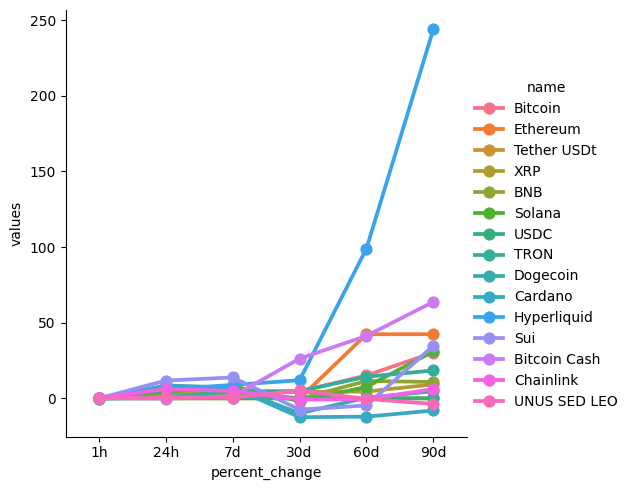

In [51]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [53]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df72[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,110003.68737,2025-07-03 15:08:30.745502
15,Bitcoin,109973.84088,2025-07-03 15:09:33.348449


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

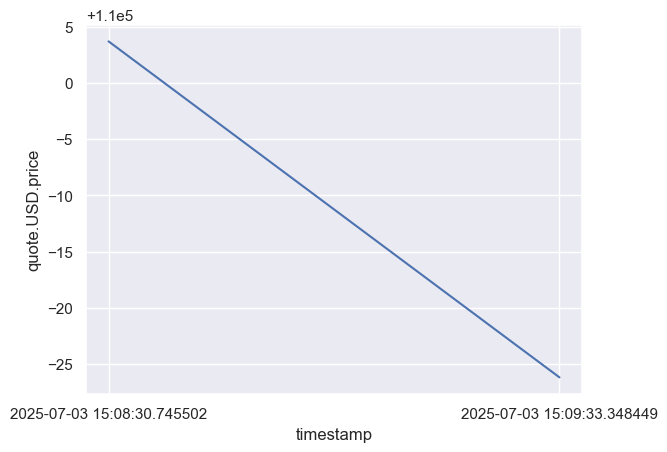

In [54]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)